# Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import data

In [2]:
#df = train data
df=pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

read sample of data

In [3]:
df.sample(10, random_state=11)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
41,1646,1,2.3,0,8,1,41,0.2,185,2,...,1725,1932,3339,18,10,19,1,1,0,3
1457,840,0,0.9,1,6,0,33,0.7,150,6,...,1482,1591,2072,10,8,19,0,1,0,2
1373,1616,1,2.3,1,3,0,52,0.1,100,5,...,151,1133,657,7,3,2,1,1,0,0
771,550,1,0.5,0,16,1,23,0.1,145,2,...,486,1930,302,18,5,8,1,0,0,0
782,1592,0,2.1,0,6,1,50,0.1,181,2,...,510,522,2103,19,8,7,1,0,0,1
74,797,1,2.9,1,4,0,38,0.5,90,4,...,763,1413,590,9,2,6,0,1,0,0
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190,657,967,10,1,14,1,0,1,0
566,1170,1,1.2,0,4,0,30,0.4,83,8,...,27,1722,1073,6,4,8,1,1,0,0
1701,1306,1,2.1,1,2,1,33,0.4,174,3,...,867,1258,2521,6,5,16,1,0,0,2
1862,1043,0,2.7,0,3,0,29,0.2,83,8,...,887,893,1183,5,3,8,1,0,0,0


# Exploratory Data Analysis (EDA)

In [4]:
#Show the dimensionality of the dataFrame (rows, cols)
df.shape

(2000, 21)

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
#the column names of the dataframe
df.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [7]:
# Show the data type of each column
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Show the number of unique observations for each column

In [8]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

Check if there are any null values

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

check repeated rows

In [10]:
df.duplicated().sum()

0

# Show value counts for each coluumn

In [11]:
numerical =['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
    
    
for col in numerical:
    d_type = df[col].dtype
    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for battery_power:
battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64
Counts for blue:
blue
0    1010
1     990
Name: count, dtype: int64
Counts for clock_speed:
clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64
Counts for dual_sim:
dual_sim
1    1019
0     981
Name: count, dtype: int64
Counts for fc:
fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64
Counts for four_g:
four_g
1    1043
0     957
Name: count, dtype: int64
Co

# target column

In [12]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [13]:
#Count the unique values in the target column
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

This is the Target variable with value of 0: (Low Cost), 1: (Medium Cost), 2: (High Cost), and 3: (Very High Cost)

# Data Visualization

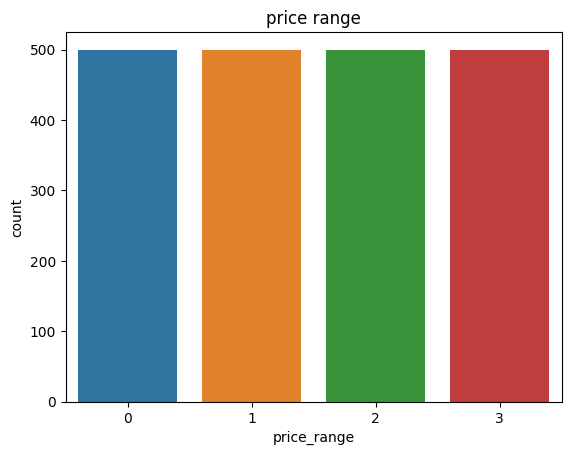

In [14]:
sns.countplot(x=df['price_range'])
plt.title('price range');

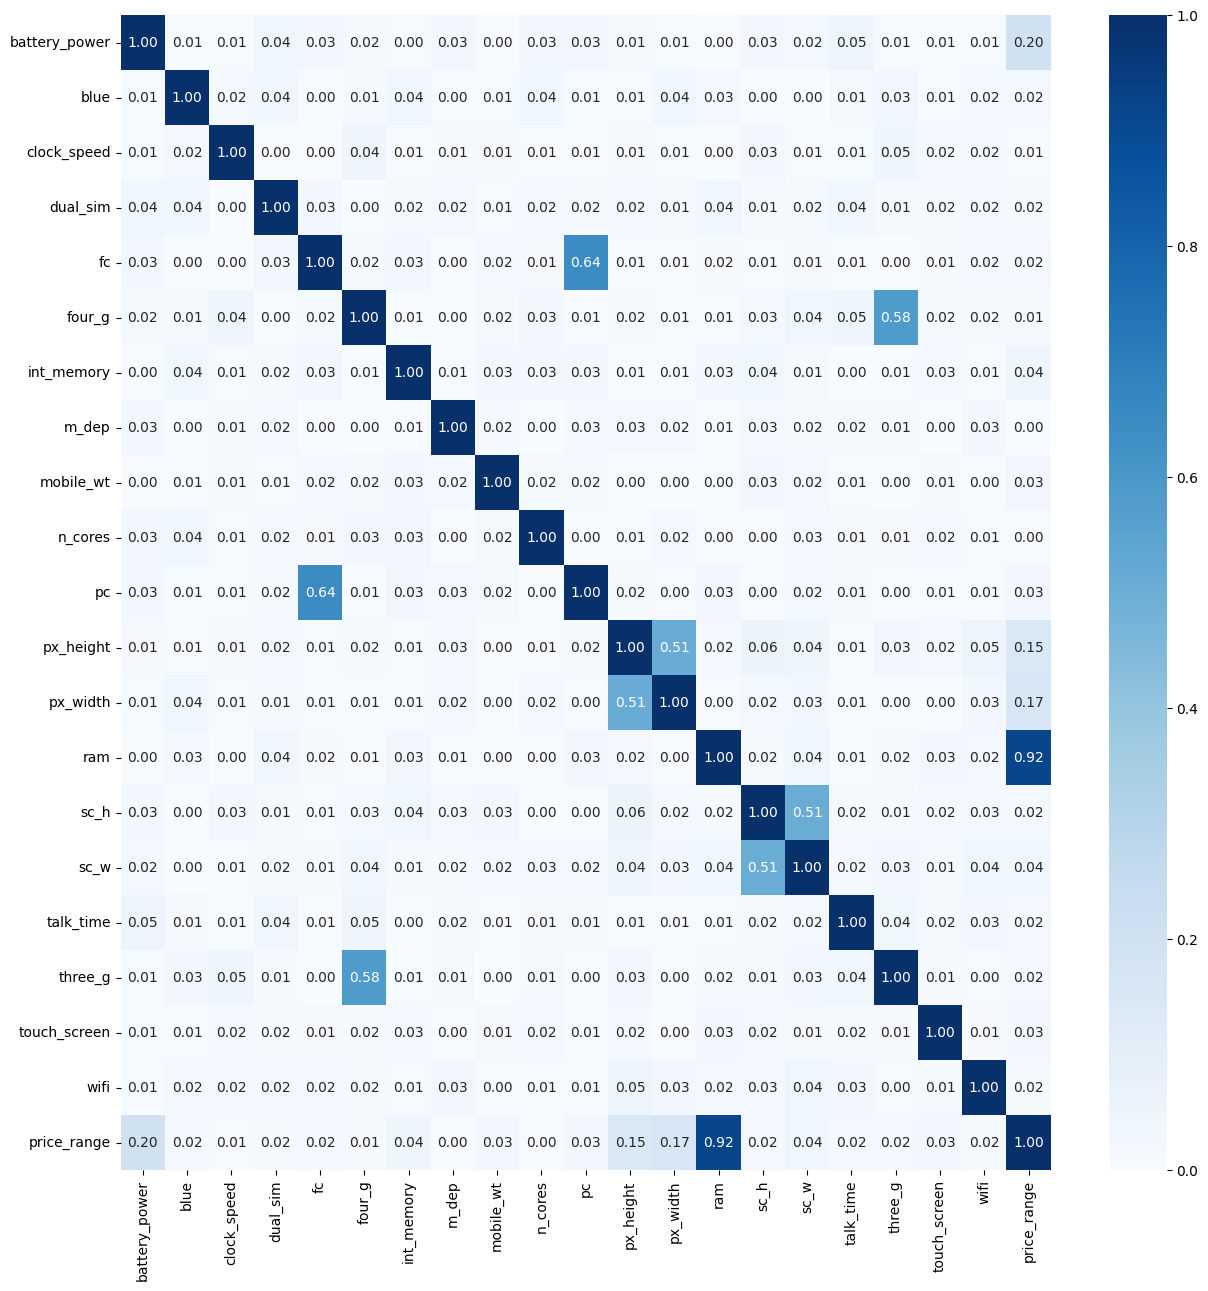

In [15]:
corr=abs(df.corr())
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues', fmt='.2f')
plt.show()

Distribution of some columns

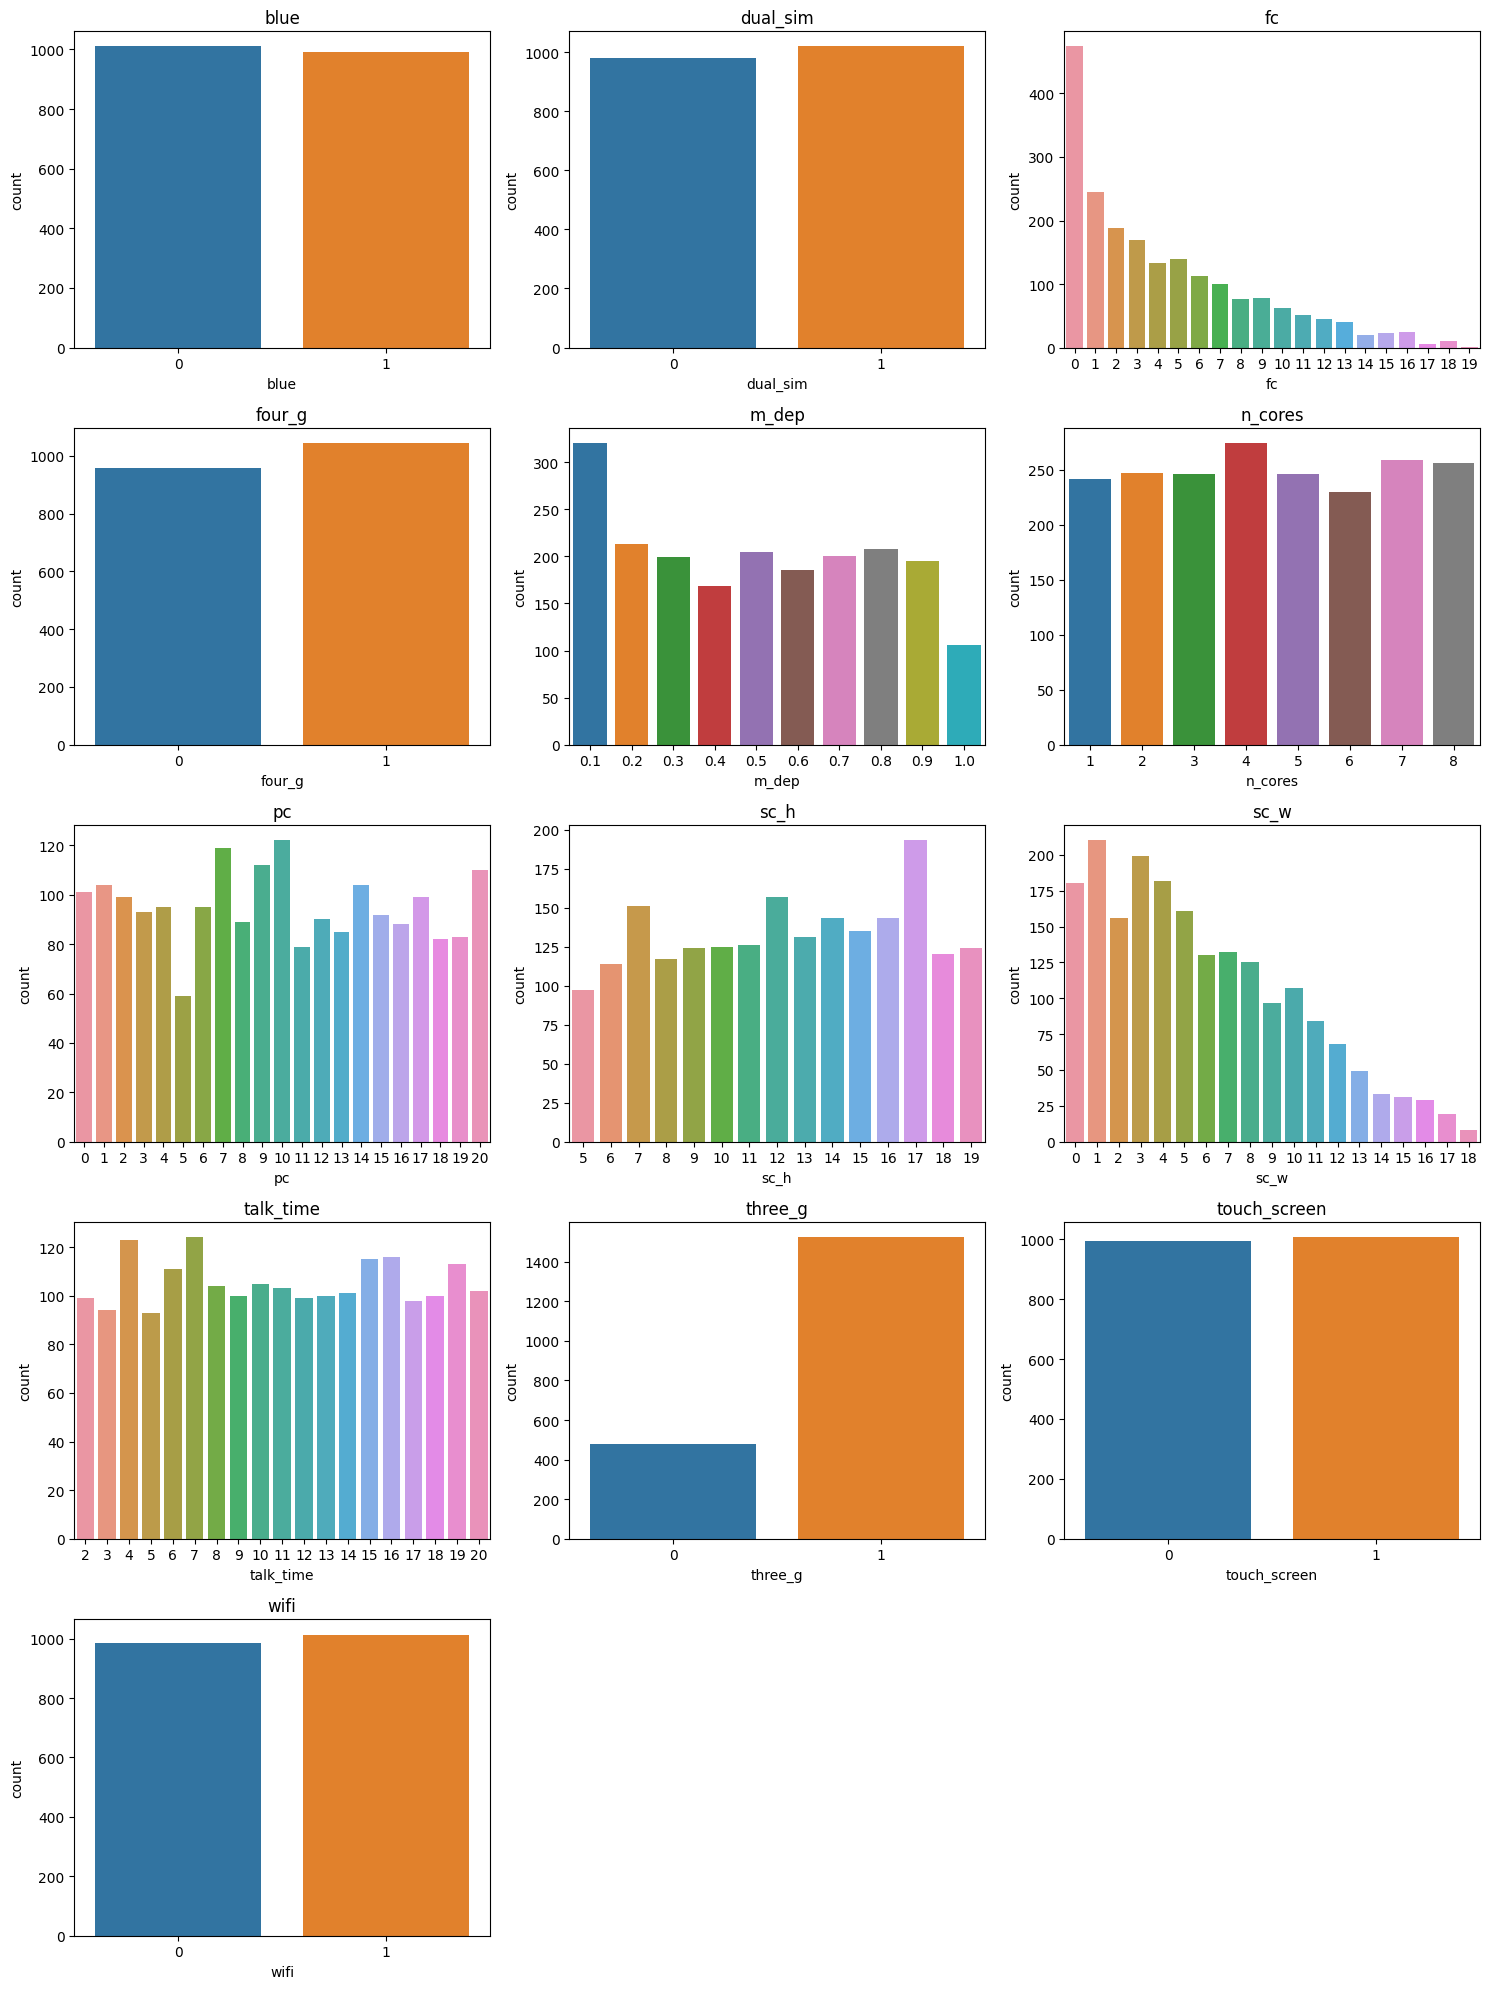

In [16]:
Columns =list(df[['blue','dual_sim','fc','four_g',
                      'm_dep','n_cores','pc','sc_h','sc_w',
                      'talk_time','three_g','touch_screen','wifi']])

plt.figure(figsize=(15,20))

for i in range(len(Columns)):
    
    plt.subplot(5,3,i+1)
    plt.title(Columns[i])
    sns.countplot(x=df[Columns[i]])
    
    
plt.tight_layout()
plt.show()

4G distribution

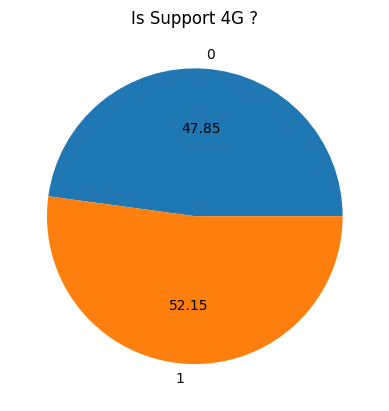

In [17]:
plt.pie(df.groupby(by=["four_g"]).size(), labels = df["four_g"].unique(),autopct = "%0.2f")
plt.title('Is Support 4G ?')
plt.show()

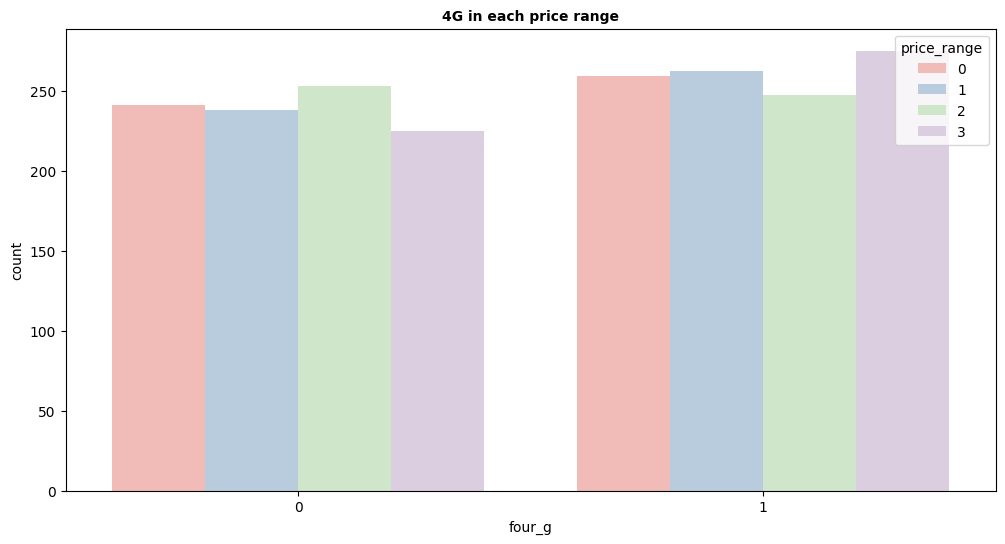

In [18]:
plt.figure(figsize=(12, 6))

sns.countplot(x='four_g',hue="price_range", data=df,palette='Pastel1')
plt.title("4G in each price range",fontweight="bold", size=10)
plt.show()

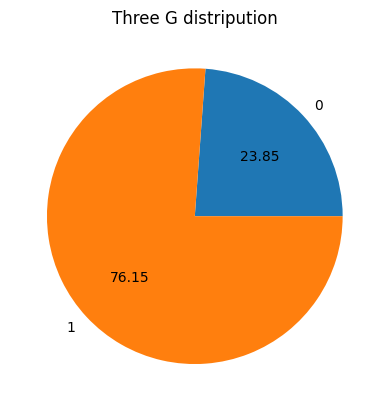

In [19]:
plt.pie(df.groupby(by=["three_g"]).size(), labels = df["three_g"].unique(),autopct = "%0.2f")
plt.title('Three G distripution')
plt.show()

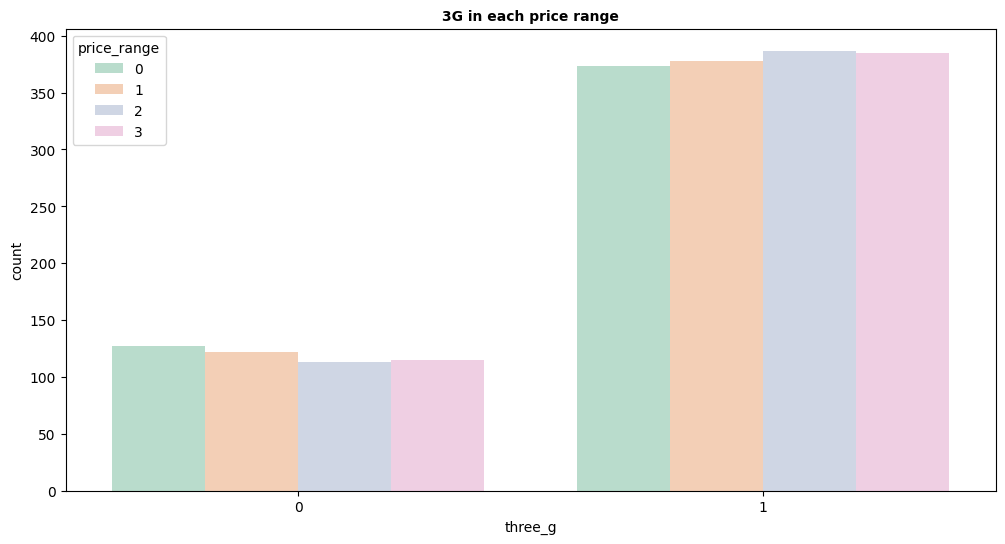

In [20]:
plt.figure(figsize=(12, 6))

sns.countplot(x='three_g',hue="price_range", data=df,palette='Pastel2')
plt.title("3G in each price range",fontweight="bold", size=10)
plt.show()

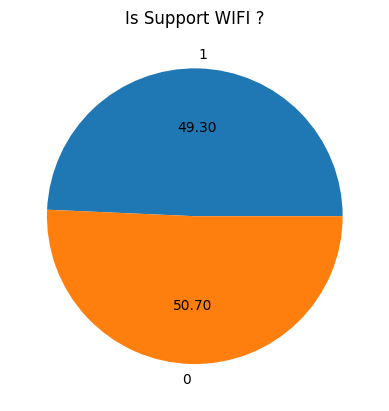

In [21]:
plt.pie(df.groupby(by=["wifi"]).size(), labels = df["wifi"].unique(),autopct = "%0.2f")
plt.title('Is Support WIFI ?' )
plt.show()

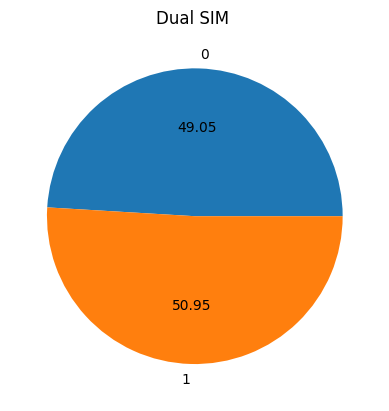

In [22]:
plt.pie(df.groupby(by=["dual_sim"]).size(), labels = df["dual_sim"].unique(),autopct = "%0.2f")
plt.title('Dual SIM ')
plt.show()

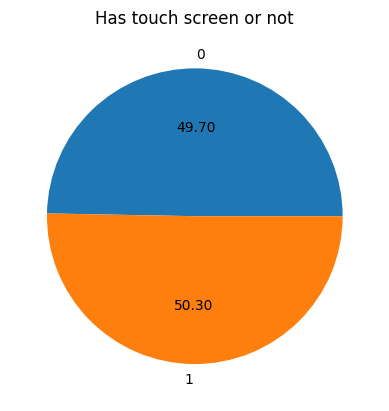

In [23]:
plt.pie(df.groupby(by=["touch_screen"]).size(), labels = df["touch_screen"].unique(),autopct = "%0.2f")
plt.title('Has touch screen or not')
plt.show()

Distribution of Battery Power

<Axes: xlabel='battery_power', ylabel='Density'>

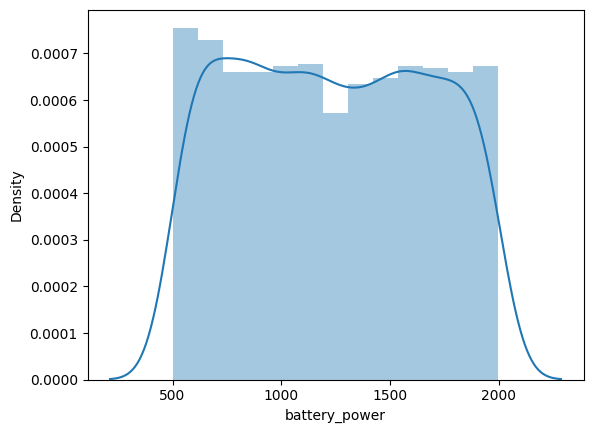

In [24]:
sns.distplot(df['battery_power'])

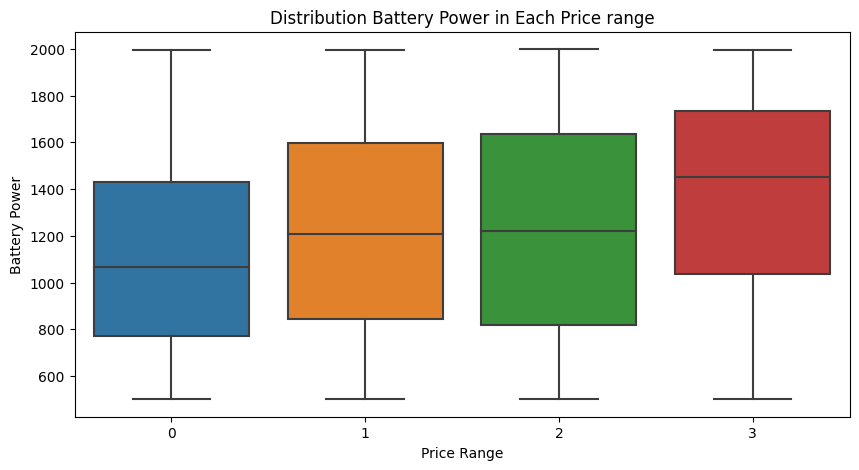

In [25]:
plt.figure(figsize=(10,5))
plt.title('Distribution Battery Power in Each Price range')
sns.boxplot(x=df['price_range'],y=df['battery_power'])
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()


<Axes: xlabel='ram', ylabel='Density'>

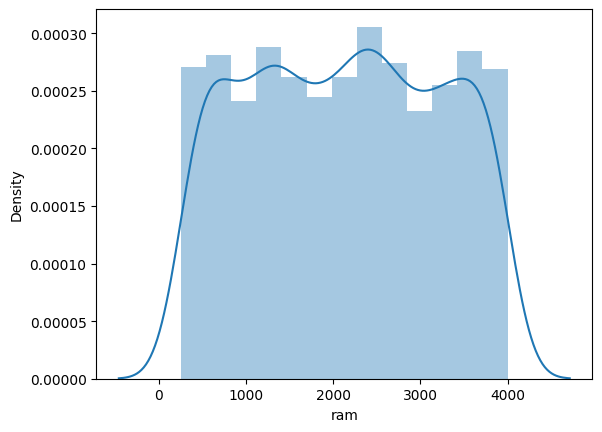

In [26]:
sns.distplot(df['ram'])

Distribution of ram size in Each Price range

Text(0, 0.5, 'ram size')

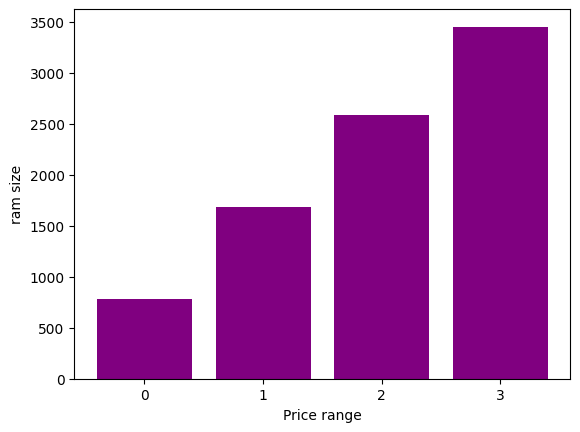

In [27]:
ram = df.groupby("price_range").mean()["ram"]
bars = plt.bar(ram.index  , ram.values  , color = "purple")
plt.xticks(ram.index)
plt.xlabel("Price range")
plt.ylabel("ram size")

# split dataframe into X and y

In [28]:
X = df.drop('price_range', axis=1)
y = df['price_range']

# split dataframe into train and test

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.15, random_state=42)

 ML models

# Random Forest

In [30]:
RF_model = RandomForestClassifier(n_estimators= 150)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=150)

In [31]:
RF_model.score(X_train , y_train)

1.0

In [32]:
RF_pred = RF_model.predict(X_test)
accuracy_score(y_test , RF_pred)

0.87

In [33]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.88      0.83      0.86        72
           2       0.75      0.84      0.79        68
           3       0.91      0.85      0.88        80

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



Text(95.72222222222221, 0.5, 'Truh')

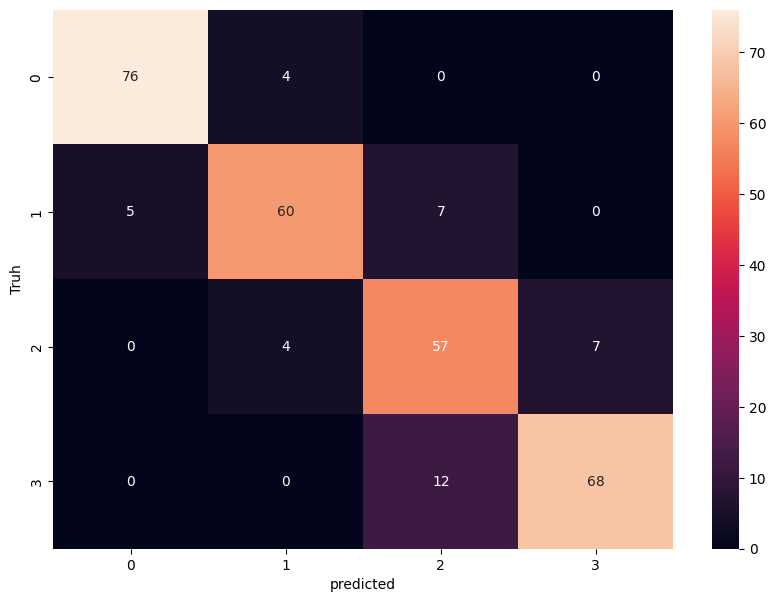

In [34]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# SVM

In [35]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
svc.score(X_train , y_train)

0.9905882352941177

In [37]:
svc_pred = svc.predict(X_test)
accuracy_score(y_test , svc_pred)

0.9666666666666667

In [38]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        80
           1       0.91      1.00      0.95        72
           2       0.98      0.96      0.97        68
           3       0.98      0.99      0.98        80

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



Text(95.72222222222221, 0.5, 'Truh')

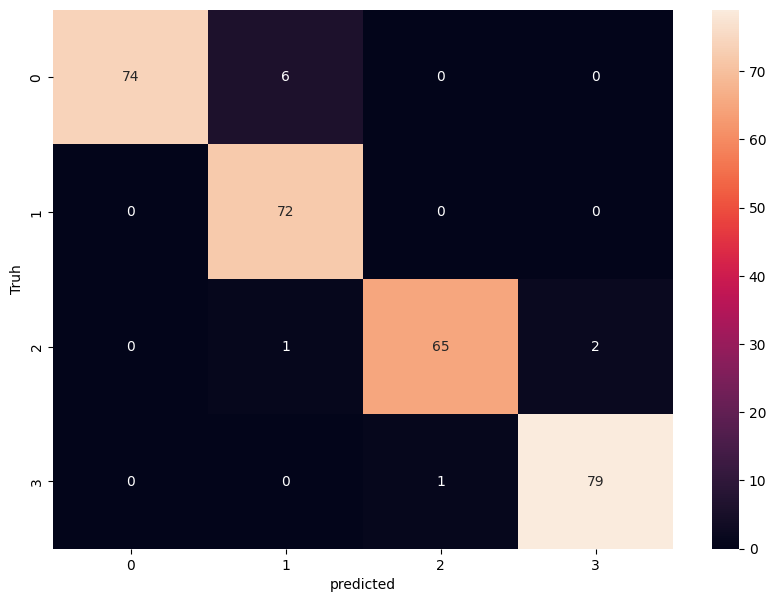

In [39]:
cm1 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')